# Natural Environment Conditions: Park Space

When deciding which Pittsburgh neighborhood is the most environmentally friendly, it's important to know how many parks / natural spaces there are. We're going to look at a data set that includes the park space, in acres, per 1000 people in each neighborhood.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

natural_data = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/14501cb9-308d-49ce-8bbb-7933ad703fe1/download/natural-environment-conditions.csv")

#### Let's take a look at some of the values for certain neighborhoods.

In [2]:
park_data = natural_data.groupby("Neighborhood").sum()["Park Space (acres/1000 pers.)"]
park_data.sort_values(ascending=True)

Neighborhood
Ridgemont              0.0
St. Clair              0.0
Knoxville              0.0
Arlington Heights      0.0
Friendship             0.0
                     ...  
Allegheny Center      59.2
Perry North           63.9
Regent Square         68.4
Chateau              144.3
South Shore          198.1
Name: Park Space (acres/1000 pers.), Length: 90, dtype: float64

#### It'd be easier to compare the values side by side, so let's graph them.

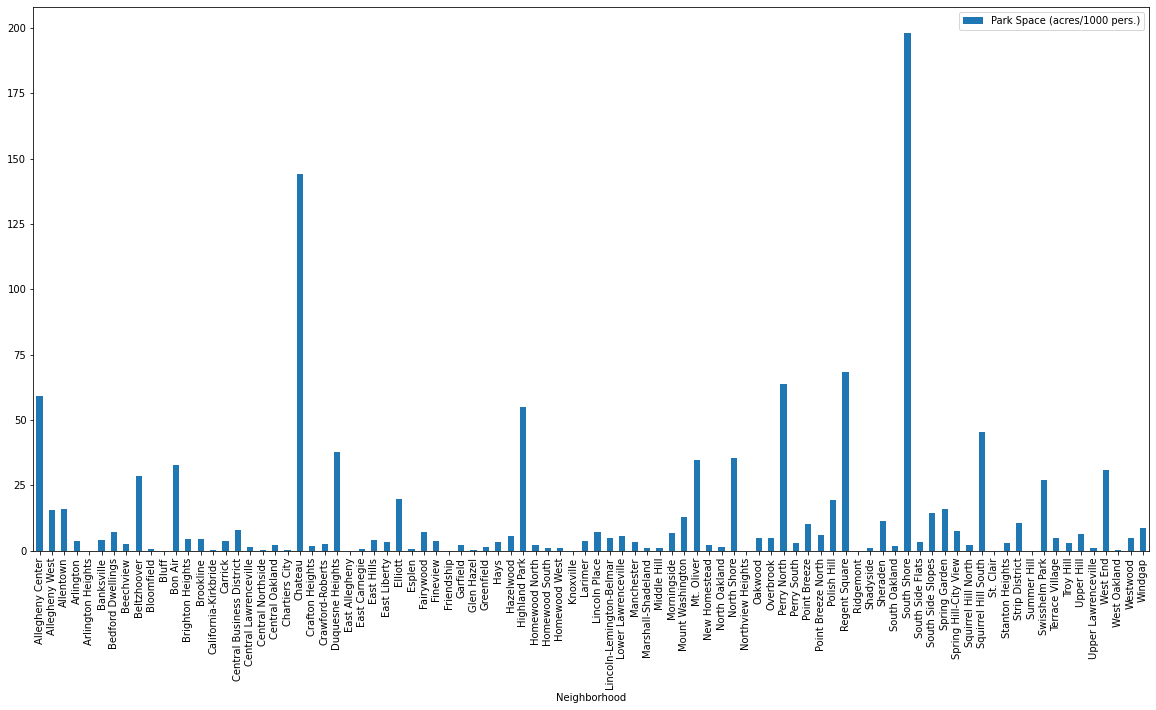

In [3]:
parkCounts = natural_data.groupby("Neighborhood").sum()["Park Space (acres/1000 pers.)"].to_frame().reset_index()
parkCounts.columns = ["Neighborhood", "Park Space (acres/1000 pers.)"]
parkCounts.plot(figsize= (20, 10), kind = "bar",x = "Neighborhood")

Now, let's look at a map of the neighborhoods in Pittsburgh.

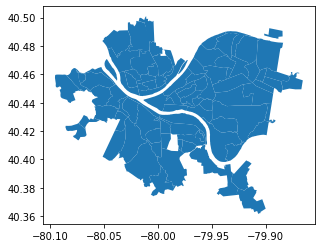

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

#### Finally, let's see what the concentration of park space in acres/1000 people looks like on this map.

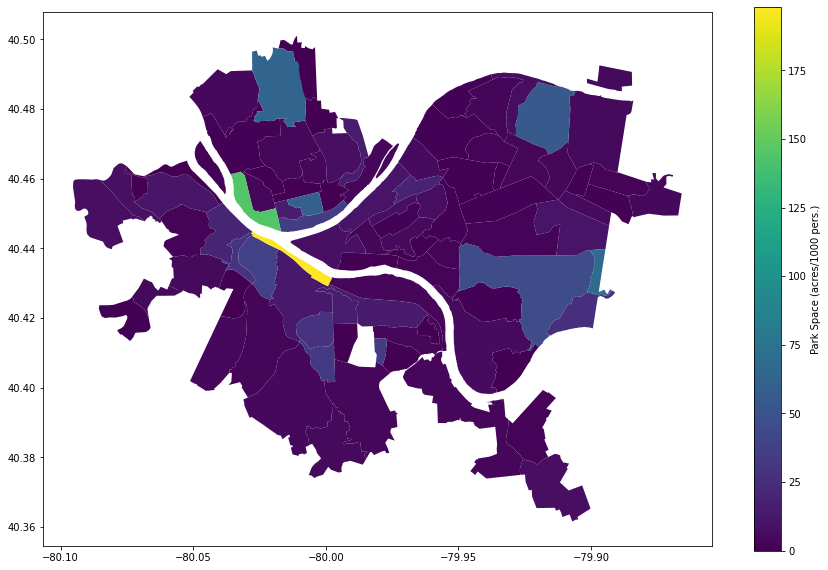

In [5]:
parkMap = neighborhoods.merge(parkCounts, how='left',left_on='hood',right_on='Neighborhood')
parkMap.plot(column = "Park Space (acres/1000 pers.)",
               cmap = "viridis",
               legend = True,
               figsize = (15,10),
               legend_kwds={'label':"Park Space (acres/1000 pers.)"})

#### Now, we're going to use the following equation to rank the neighborhoods and take a look at some of their scores.

In [6]:
maxParks = parkCounts.max()['Park Space (acres/1000 pers.)']
minParks = parkCounts.min()['Park Space (acres/1000 pers.)']
parkScores = parkCounts['Park Space (acres/1000 pers.)'].map(lambda x : ((x - minParks) / (maxParks - minParks)))
parkCounts['score'] = parkScores
parkCounts.head()

,Neighborhood,Park Space (acres/1000 pers.),score
0,Allegheny Center,59.2,0.298839
1,Allegheny West,15.5,0.078243
2,Allentown,15.8,0.079758
3,Arlington,3.6,0.018173
4,Arlington Heights,0.0,0.000000
